In [1]:
!pip install pandas numpy scikit-learn xgboost matplotlib seaborn geopy streamlit mlflow


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached streamlit-1.45.0-py3-none-any.whl.metadata (8.9 kB)
  Using cached mlflow-2.22.0-py3-none-any.whl.metadata (30 kB)
  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached GitPython-3.1.44-py3-none-any.whl.metadata (13 kB)
  Using cached mlflow_skinny-2.22.0-py3-none-any.whl.metadata (31 kB)
  Using cached alembic-1.15.2-py3-none-any.whl.metadata (7.3 kB)
  Using cached graphene-3.4.3-py2.py3-none-any.whl.metadata (6.9 kB)
  Using cached databricks_sdk-0.52.0-py3-none-any.whl.metadata (39 kB)
  Using cached fastapi-0.115.12-py3-none-any.whl.metadata (27 kB)
  Using cached opentelemetry_sdk-1.33.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached google_auth-2.40.1-py2.py3-none-any.whl.metadata (6.2 kB)
  Using cached opentelemetry_semantic_conventions-0.54b0-py3-none-any.whl.metadata (2.5 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached streamlit-1.45.0-py3-none-any


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic


In [4]:
df = pd.read_csv(r'D:\Python\amazon_project\amazon_delivery.csv')
df.head()


,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [5]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

In [7]:
# Convert Order_Date safely
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

# Convert Order_Time and Pickup_Time safely
df['Order_Time'] = pd.to_datetime(df['Order_Time'], errors='coerce').dt.time
df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'], errors='coerce').dt.time



C:\Users\chauh\AppData\Local\Temp\ipykernel_7428\3505488857.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order_Time'] = pd.to_datetime(df['Order_Time'], errors='coerce').dt.time
C:\Users\chauh\AppData\Local\Temp\ipykernel_7428\3505488857.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'], errors='coerce').dt.time


In [8]:
df = df.dropna(subset=['Order_Date', 'Order_Time', 'Pickup_Time'])


In [9]:
df = df.dropna()  # OR use df.fillna(method='ffill') if suitable


In [10]:
def calculate_distance(row):
    store = (row['Store_Latitude'], row['Store_Longitude'])
    drop = (row['Drop_Latitude'], row['Drop_Longitude'])
    return geodesic(store, drop).km

df['Distance_km'] = df.apply(calculate_distance, axis=1)


In [11]:
df['Order_Hour'] = pd.to_datetime(df['Order_Time'].astype(str)).dt.hour


C:\Users\chauh\AppData\Local\Temp\ipykernel_7428\3481653202.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order_Hour'] = pd.to_datetime(df['Order_Time'].astype(str)).dt.hour


In [12]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Weather', 'Traffic', 'Vehicle', 'Area', 'Category']

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [13]:
df['Delivery_Time'] = pd.to_numeric(df['Delivery_Time'], errors='coerce')


In [14]:
df.info()
df.to_csv('data/processed_data.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
Index: 43594 entries, 0 to 43738
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order_ID         43594 non-null  object        
 1   Agent_Age        43594 non-null  int64         
 2   Agent_Rating     43594 non-null  float64       
 3   Store_Latitude   43594 non-null  float64       
 4   Store_Longitude  43594 non-null  float64       
 5   Drop_Latitude    43594 non-null  float64       
 6   Drop_Longitude   43594 non-null  float64       
 7   Order_Date       43594 non-null  datetime64[ns]
 8   Order_Time       43594 non-null  object        
 9   Pickup_Time      43594 non-null  object        
 10  Weather          43594 non-null  int64         
 11  Traffic          43594 non-null  int64         
 12  Vehicle          43594 non-null  int64         
 13  Area             43594 non-null  int64         
 14  Delivery_Time    43594 non-null  int64     

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set default styling
sns.set(style="whitegrid")


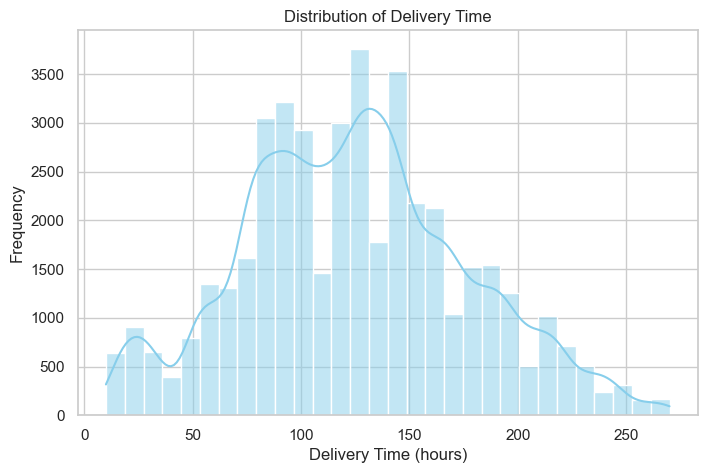

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df['Delivery_Time'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (hours)')
plt.ylabel('Frequency')
plt.show()


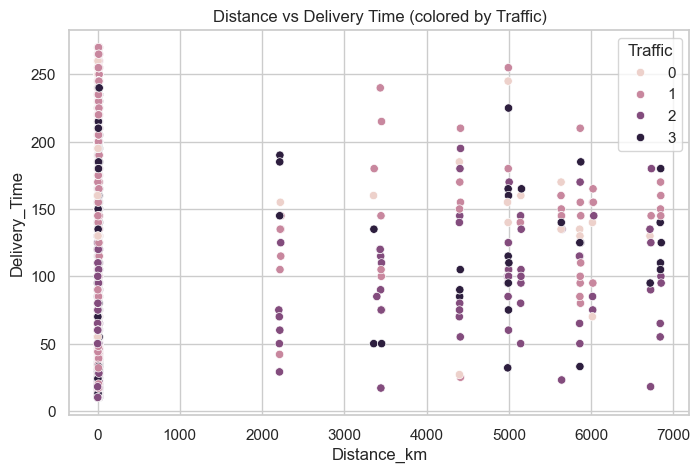

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Distance_km', y='Delivery_Time', hue='Traffic')
plt.title('Distance vs Delivery Time (colored by Traffic)')
plt.show()


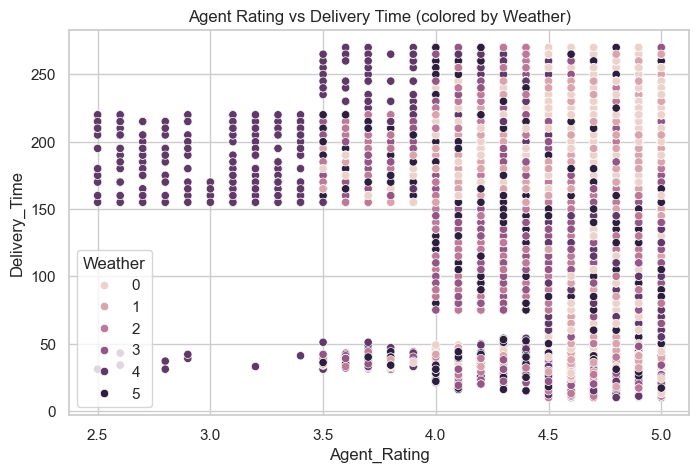

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Agent_Rating', y='Delivery_Time', hue='Weather')
plt.title('Agent Rating vs Delivery Time (colored by Weather)')
plt.show()


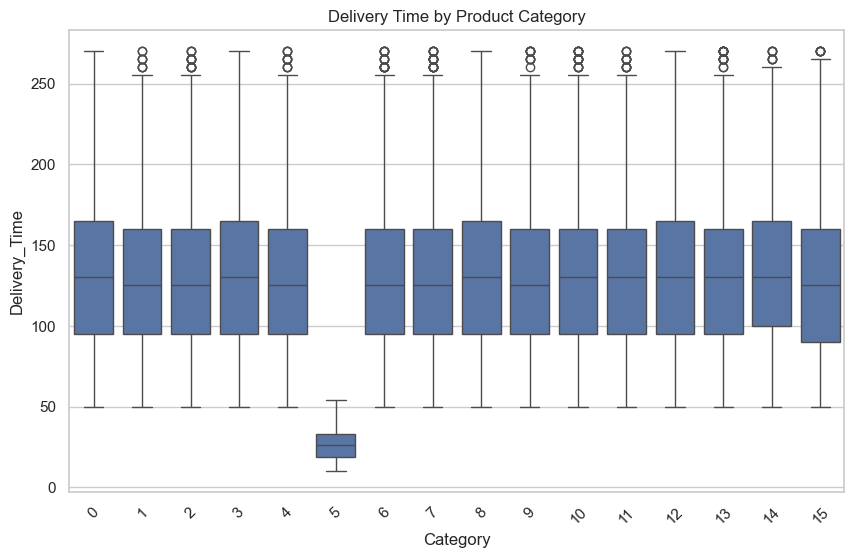

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Category', y='Delivery_Time')
plt.title('Delivery Time by Product Category')
plt.xticks(rotation=45)
plt.show()


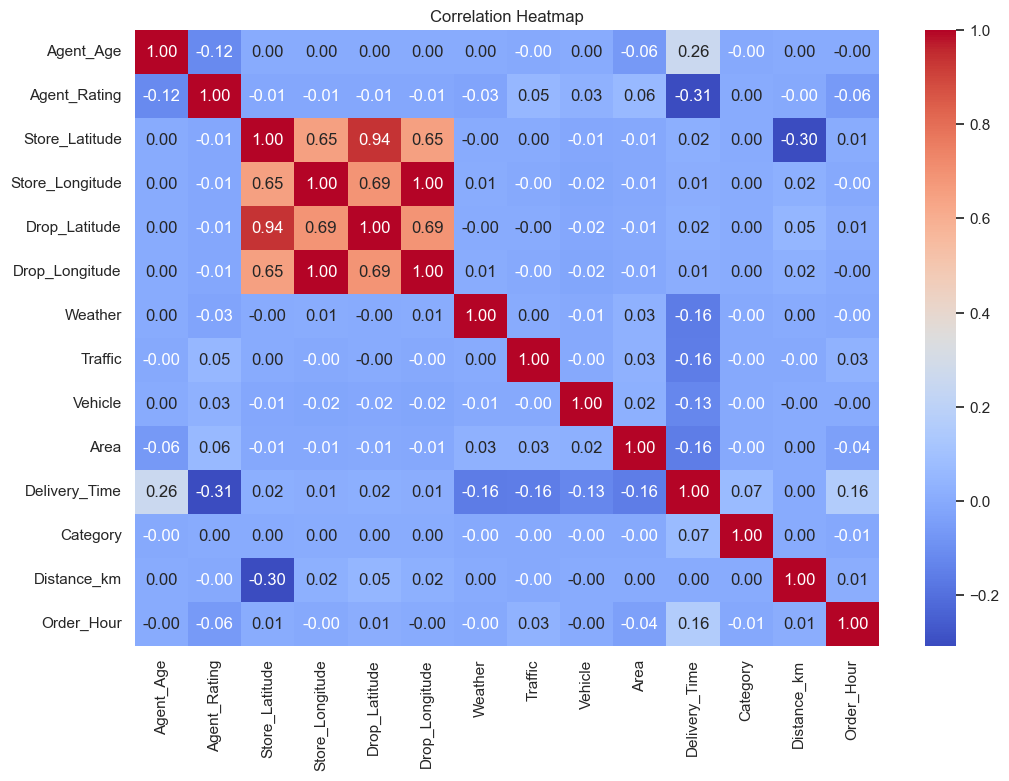

In [20]:
plt.figure(figsize=(12,8))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


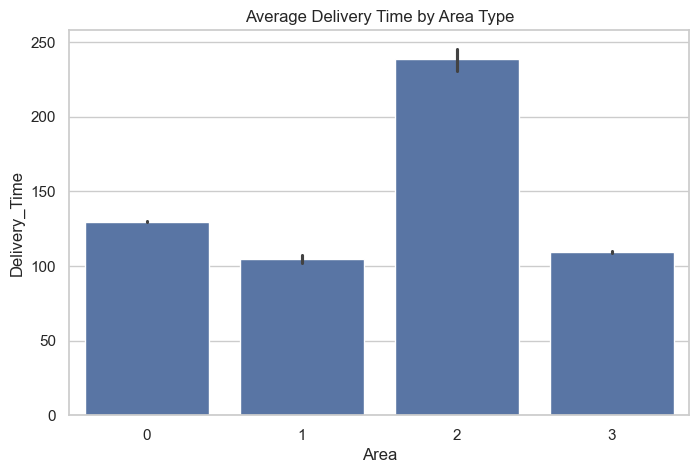

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Area', y='Delivery_Time')
plt.title('Average Delivery Time by Area Type')
plt.show()


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [23]:
categorical_cols = ['Weather', 'Traffic', 'Vehicle', 'Area', 'Category']

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [24]:
df['Order_Hour'] = pd.to_datetime(df['Order_Time'].astype(str), errors='coerce').dt.hour
df['Pickup_Hour'] = pd.to_datetime(df['Pickup_Time'].astype(str), errors='coerce').dt.hour


C:\Users\chauh\AppData\Local\Temp\ipykernel_7428\2806659303.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order_Hour'] = pd.to_datetime(df['Order_Time'].astype(str), errors='coerce').dt.hour
C:\Users\chauh\AppData\Local\Temp\ipykernel_7428\2806659303.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Pickup_Hour'] = pd.to_datetime(df['Pickup_Time'].astype(str), errors='coerce').dt.hour


In [25]:
df = df.dropna(subset=['Order_Hour', 'Pickup_Hour'])


In [26]:
X = df[['Distance_km', 'Agent_Age', 'Agent_Rating', 'Weather', 'Traffic', 
        'Vehicle', 'Area', 'Category', 'Order_Hour', 'Pickup_Hour']]

y = df['Delivery_Time']


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [41]:
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ensure you end the previous run
def train_and_evaluate(model, model_name):
    # End any previously active run if exists
    mlflow.end_run()

    # Start a new MLflow run for each model
    with mlflow.start_run():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Log metrics and model with MLflow
        mlflow.log_param("model", model_name)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("mae", mae)
        mlflow.log_metric("r2", r2)
        mlflow.sklearn.log_model(model, model_name)

        # Print the metrics for review
        print(f"{model_name} Metrics:")
        print(f"RMSE: {rmse:.4f}")
        print(f"MAE: {mae:.4f}")
        print(f"R2: {r2:.4f}")
        print("-" * 40)


In [42]:
# Example model training
lr_model = LinearRegression()
train_and_evaluate(lr_model, "Linear Regression")

rf_model = RandomForestRegressor()
train_and_evaluate(rf_model, "Random Forest Regressor")


2025/05/12 22:19:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Linear Regression Metrics:
RMSE: 44.4094
MAE: 34.2085
R2: 0.2501
----------------------------------------


2025/05/12 22:19:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest Regressor Metrics:
RMSE: 23.3118
MAE: 17.9152
R2: 0.7934
----------------------------------------


In [43]:
gb_model = GradientBoostingRegressor(random_state=42)
train_and_evaluate(gb_model, "Gradient Boosting Regressor")


2025/05/12 22:20:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Gradient Boosting Regressor Metrics:
RMSE: 24.5424
MAE: 19.2730
R2: 0.7710
----------------------------------------


In [44]:
mlflow.end_run()


In [46]:
from sklearn.linear_model import LinearRegression  # or any model you trained
import joblib

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)  # Make sure X_train and y_train are defined


LinearRegression()

In [48]:
joblib.dump(model, "best_model.pkl")


['best_model.pkl']

In [49]:
joblib.dump(X_train.columns.tolist(), "model_columns.pkl")


['model_columns.pkl']